In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import pymc3 as pm

import matplotlib.pyplot as plt
import seaborn as sns

import theano

from matplotlib.pyplot import cm

sns.set_style("whitegrid")

%matplotlib inline

/Users/conormd/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
TAU = 111 # indium decay half life
A = 32  # starting magnitude
C = 12 # measurement error
noise_scale = 4

def load_decay():
    t = np.arange(0, 1000)
    def decay_func(ts, noise):
        return A  * np.exp(-t/TAU) + C + np.random.normal(0, noise, size=(len(t)))

    data = {'t': t, 'activity': decay_func(t, noise_scale)}
    df = pd.DataFrame(data)
    return df

In [3]:
df = load_decay()

t = theano.shared(df["t"].values)
activity = theano.shared(df.activity.values)

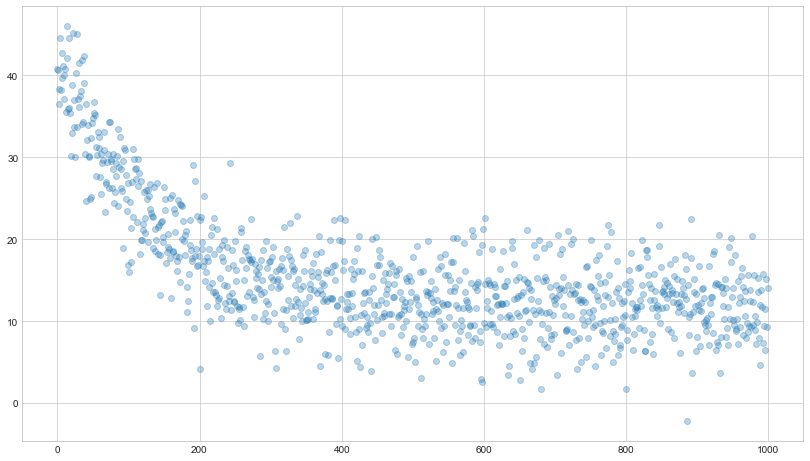

In [4]:
plt.figure(figsize=(14, 8))
plt.scatter(x=df.t, y=df.activity, alpha=.3)

In [8]:
#https://github.com/conormm/bayesian-stats-modelling-tutorial/blob/master/notebooks/data.py
# exp link = A * np.exp(-df['t'].values / tau) + C

In [13]:
nls = pm.Model()

with nls:
    
    tau = pm.Exponential("tau", lam=1)
    a = pm.HalfNormal("a", sd=100)
    c = pm.HalfNormal("c", sd=100)
    e = pm.Normal("e", 0, 3)
    
    sd = pm.HalfCauchy("sd", 100)
    
    link = (a * np.exp(-df["t"].values / tau) + c) + e
    like = pm.Normal("like", link, sd, observed=df.activity.values)

In [14]:
trace = pm.sample(2000, model=nls)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/conormd/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, e, c_log__, a_log__, tau_log__]
100%|██████████| 2500/2500 [00:36<00:00, 67.68it/s]


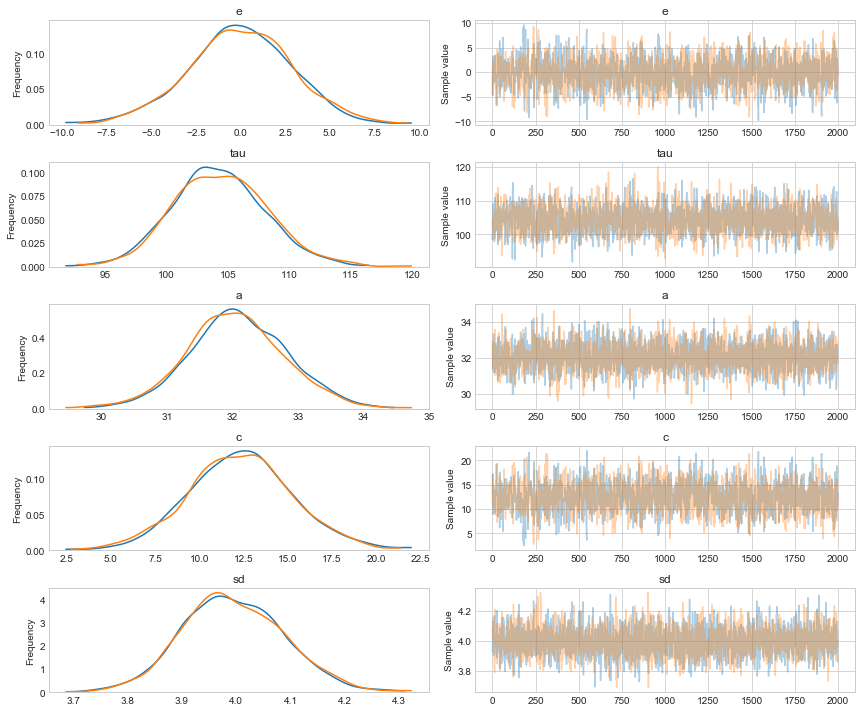

In [15]:
pm.traceplot(trace);

In [83]:
with nls:
    ppc = pm.sample_ppc(trace, samples=10)

100%|██████████| 10/10 [00:01<00:00,  6.88it/s]


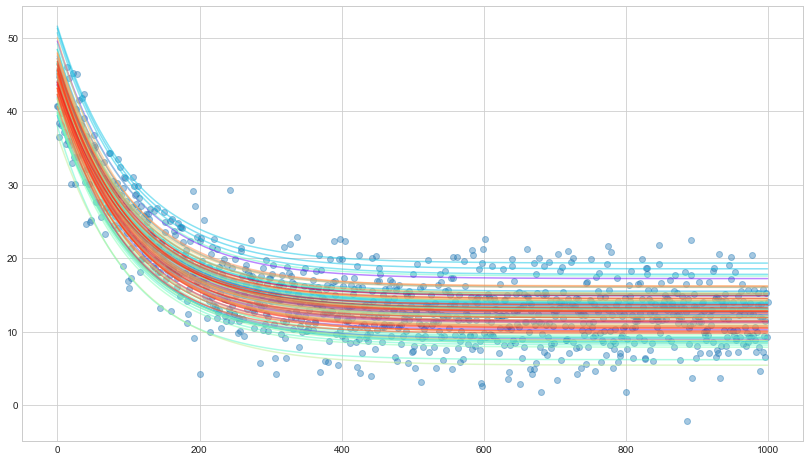

In [16]:
plt.figure(figsize=(14, 8))

n = 100
colour = iter(cm.rainbow(np.linspace(0,1,n)))

plt.scatter(df.t, df.activity, alpha=.4)
for i in range(n):
    u = trace["a"][i] * np.exp(-df["t"].values / trace["tau"][i]) + trace["c"][i] 
    c = next(colour)
    plt.plot(df.t, u, alpha=.5, c=c)
    
#plt.plot(df.t, (A * np.exp(-df["t"].values / TAU) + C), c="black", alpha=.4)

In [131]:
import pomegranate as pg

In [ ]:
pg.Distribution

In [112]:
pm.waic(trace, model=nls)

WAIC_r(WAIC=5713.554201747452, WAIC_se=45.38160139694481, p_WAIC=4.0699553435510145)

In [70]:
cv = pm.loo(trace, model=nls, )

In [73]:
cv.

3.642710674521595

In [121]:
polynomial_fit([1, 2, 3], x=np.random.normal(size=(10)))

array([ 0.82079951,  1.83133629,  5.18242195,  4.1015122 ,  6.13469568,
       12.96746525,  5.77207322,  4.0006451 ,  2.179549  , 12.66864553])

In [122]:
with nls:
    preds = pm.sample_ppc(trace, 10)

100%|██████████| 10/10 [00:01<00:00,  5.81it/s]


In [128]:
preds["like"].shape

(10, 1000)

SyntaxError: unexpected EOF while parsing (<ipython-input-129-6bdf288e3034>, line 2)